**Group Assignment**

**Facial Expression Recognition**


---

Group No:49

Tutorial No: T04

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Data Preparation :

Image distribution across emotions:
angry: 186 images
disgust: 200 images
fear: 210 images
happy: 200 images
neutral: 200 images
sad: 186 images
surprise: 200 images


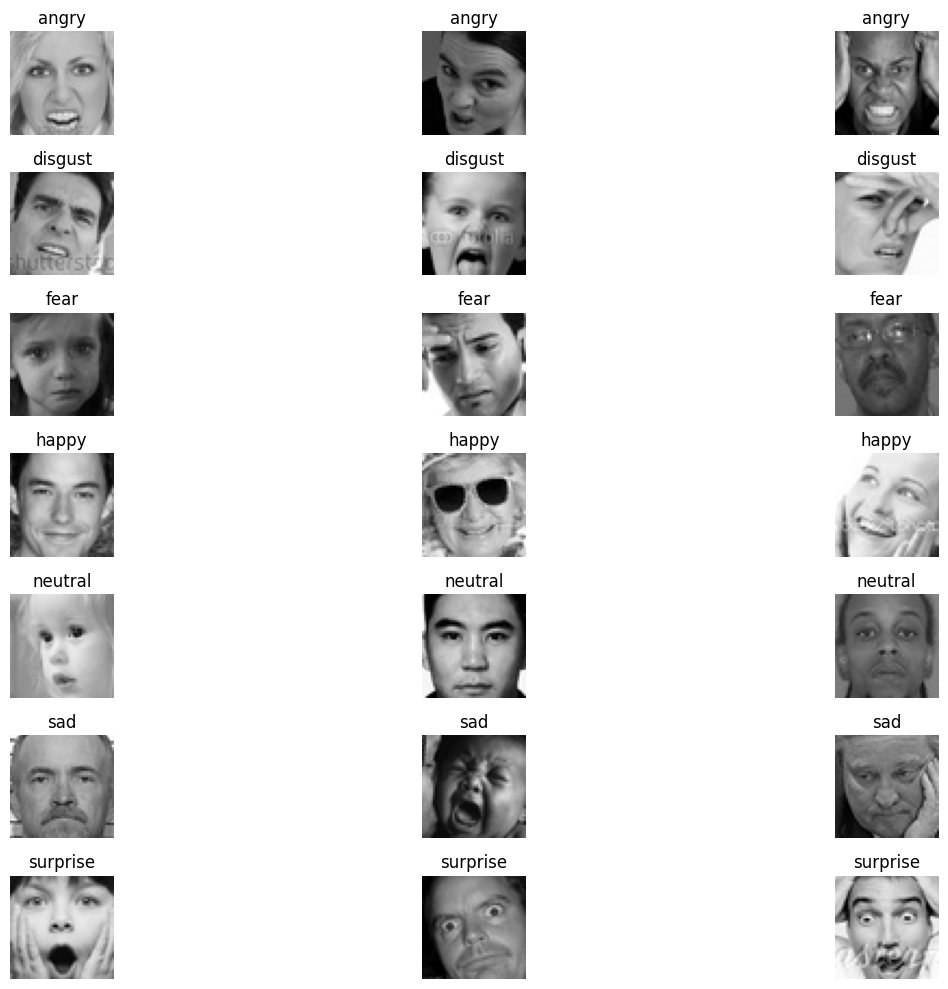

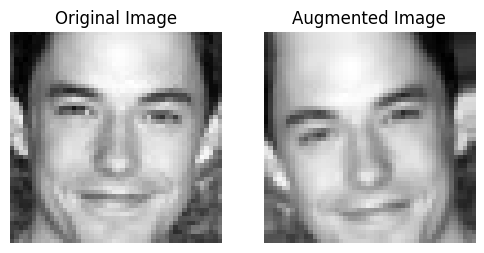

In [ ]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the path to the dataset
dataset_path = '/content/drive/MyDrive/Train'

# Define the categories of emotions
emotion_categories = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# Initialize a dictionary to store the count of images in each category
emotion_counts = {emotion: 0 for emotion in emotion_categories}

# Explore the dataset and count the images in each category
for emotion in emotion_categories:
    emotion_folder = os.path.join(dataset_path, emotion)
    emotion_counts[emotion] = len(os.listdir(emotion_folder))

# Display the distribution of images across different emotions
print("Image distribution across emotions:")
for emotion, count in emotion_counts.items():
    print(f"{emotion}: {count} images")

# Display some sample images from each category
def display_sample_images(dataset_path, emotion_categories, samples_per_category=3):
    plt.figure(figsize=(15, 10))
    for idx, emotion in enumerate(emotion_categories):
        emotion_folder = os.path.join(dataset_path, emotion)
        image_files = os.listdir(emotion_folder)
        for i in range(samples_per_category):
            image_path = os.path.join(emotion_folder, image_files[i])
            img = cv2.imread(image_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.subplot(len(emotion_categories), samples_per_category, idx * samples_per_category + i + 1)
            plt.imshow(img)
            plt.title(emotion)
            plt.axis('off')
    plt.tight_layout()
    plt.show()

display_sample_images(dataset_path, emotion_categories)

# Data Augmentation using ImageDataGenerator
data_gen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Example of loading and augmenting the data
def load_and_preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (48, 48))
    img = np.expand_dims(img, -1)
    return img

# Example of applying data augmentation
sample_image_path = os.path.join(dataset_path, 'happy', os.listdir(os.path.join(dataset_path, 'happy'))[0])
sample_image = load_and_preprocess_image(sample_image_path)
sample_image = np.expand_dims(sample_image, 0)  # Expand dimensions to fit the model's input

# Generating augmented images
augmented_images = next(data_gen.flow(sample_image, batch_size=1))

# Display the original and augmented images
plt.figure(figsize=(6, 6))
plt.subplot(1, 2, 1)
plt.imshow(sample_image[0].reshape(48, 48), cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(augmented_images[0].reshape(48, 48), cmap='gray')
plt.title('Augmented Image')
plt.axis('off')

plt.show()


Model Training:


Train Generator and validation generator:


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image data generator for training and validation datasets
datagen = ImageDataGenerator(
    rescale=1./255,         # Rescale pixel values to [0, 1]
    rotation_range=10,      # Random rotation
    width_shift_range=0.1,  # Random horizontal shift
    height_shift_range=0.1, # Random vertical shift
    zoom_range=0.1,         # Random zoom
    horizontal_flip=True,   # Random horizontal flip
    validation_split=0.2    # Split data into training and validation sets
)

# Specify the paths to your dataset
train_data_dir = '/content/drive/MyDrive/Train'

# Create training and validation data generators
train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(48, 48),   # Resize images to 48x48
    color_mode='grayscale', # Convert images to grayscale
    batch_size=32,          # Number of images to yield per batch
    class_mode='categorical', # Use categorical labels (for multi-class classification)
    subset='training'       # Set as training data
)

validation_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(48, 48),   # Resize images to 48x48
    color_mode='grayscale', # Convert images to grayscale
    batch_size=32,          # Number of images to yield per batch
    class_mode='categorical', # Use categorical labels (for multi-class classification)
    subset='validation'     # Set as validation data
)


Found 1106 images belonging to 7 classes.
Found 276 images belonging to 7 classes.


A. Convolutional Neural Network(CNN):

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
def create_cnn_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(7, activation='softmax'))  # 7 output neurons for 7 emotion classes
    return model

input_shape = (48, 48, 1)
cnn_model = create_cnn_model(input_shape)

# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = cnn_model.fit(train_generator, validation_data=validation_generator, epochs=25)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


35/35 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.1591 - loss: 1.9529 - val_accuracy: 0.1449 - val_loss: 1.9455
Epoch 2/25
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 265ms/step - accuracy: 0.1485 - loss: 1.9455 - val_accuracy: 0.1522 - val_loss: 1.9455
Epoch 3/25
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 202ms/step - accuracy: 0.1294 - loss: 1.9458 - val_accuracy: 0.1522 - val_loss: 1.9451
Epoch 4/25
35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 219ms/step - accuracy: 0.1481 - loss: 1.9460 - val_accuracy: 0.1522 - val_loss: 1.9450
Epoch 5/25
35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 262ms/step - accuracy: 0.1386 - loss: 1.9459 - val_accuracy: 0.1522 - val_loss: 1.9445
Epoch 6/25
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 211ms/step - accuracy: 0.1506 - loss: 1.9442 - val_accuracy: 0.1594 - val_loss: 1.9436
Epoch 7/25
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 233ms/step - accuracy: 0.1364 - loss: 1.9428 - val_accuracy: 0.1558 - val_loss: 1.9346
Epoch 8/25
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 251ms/step - accuracy: 0.1758 - loss: 1.9280 - val_accuracy: 0.1993 - va

B. VGG

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the VGG-like model
def create_vgg_like(input_shape, num_classes):
    model = Sequential([
        Conv2D(64, (3, 3), activation='relu', input_shape=input_shape),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(256, (3, 3), activation='relu'),
        Conv2D(256, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Define the input shape and number of classes
input_shape = (48, 48, 1)  # For grayscale images with 1 channel
num_classes = 7  # Number of classes (e.g., 7 different emotions)

# Create the VGG-like model
vgg_model = create_vgg_like(input_shape, num_classes)

# Compile the model
vgg_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
vgg_model.summary()

# Set up ImageDataGenerator for training and validation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2  # 20% of data for validation
)

# Training and validation generators
train_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Train',  # Update this path
    target_size=(48, 48),
    color_mode='grayscale',  # Specify grayscale mode
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Train',  # Update this path
    target_size=(48, 48),
    color_mode='grayscale',  # Specify grayscale mode
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Train the model
history_vgg = vgg_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=25  # Adjust based on your requirements
)



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 46, 46, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 44, 44, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 20, 20, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 18, 18, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 9, 9, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 5, 5, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │           3,591 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,672,647 (6.38 MB)

 Trainable params: 1,672,647 (6.38 MB)

 Non-trainable params: 0 (0.00 B)

Found 1106 images belonging to 7 classes.
Found 276 images belonging to 7 classes.
Epoch 1/25
35/35 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.1169 - loss: 1.9523 - val_accuracy: 0.1449 - val_loss: 1.9455
Epoch 2/25
35/35 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.1512 - loss: 1.9456 - val_accuracy: 0.1522 - val_loss: 1.9452
Epoch 3/25
35/35 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.1324 - loss: 1.9463 - val_accuracy: 0.1522 - val_loss: 1.9453
Epoch 4/25
35/35 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.1507 - loss: 1.9454 - val_accuracy: 0.1522 - val_loss: 1.9450
Epoch 5/25
35/35 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.1157 - loss: 1.9486 - val_accuracy: 0.1522 - val_loss: 1.9452
Epoch 6/25
35/35 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.1214 - loss: 1.9472 - val_accuracy: 0.1522 - val_loss: 1.9453
Epoch 7/25
35/35 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.1661 - loss: 1.9450 - val_accuracy: 0.1522 - val_loss: 1.9451
Epoch 8/25
35/35 ━━━━━━━━━━━━━━━━━━

C. ResNut with Training

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Define the ResNet model with transfer learning
def create_resnet(input_shape, num_classes):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

    # Freeze the base model
    for layer in base_model.layers:
        layer.trainable = False

    # Add custom layers on top
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    return model

# Define the input shape and number of classes
input_shape = (48, 48, 3)  # Images are 48x48 pixels with 3 color channels (RGB)
num_classes = 7  # Number of emotion classes

# Create the ResNet model
resnet_model = create_resnet(input_shape, num_classes)

# Compile the model
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
resnet_model.summary()


# Set up ImageDataGenerator without preprocessing function for RGB
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

# Training and validation data generators with RGB images
train_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Train',
    target_size=(48, 48),
    color_mode='rgb',  # Load images as RGB
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Train',
    target_size=(48, 48),
    color_mode='rgb',  # Load images as RGB
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


# Train the model
history_resnet = resnet_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=25  # Adjust based on your requirements
)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 48, 48, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 54, 54, 3)      │              0 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 24, 24, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 24, 24, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 24, 24, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 26, 26, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 12, 12, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 12, 12, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 12, 12, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 12, 12, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 12, 12, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 12, 12, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 12, 12, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 12, 12, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 12, 12, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 24,114,055 (91.99 MB)

 Trainable params: 526,343 (2.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Found 1106 images belonging to 7 classes.
Found 276 images belonging to 7 classes.
Epoch 1/25
35/35 ━━━━━━━━━━━━━━━━━━━━ 31s 600ms/step - accuracy: 0.1393 - loss: 2.2186 - val_accuracy: 0.1413 - val_loss: 1.9617
Epoch 2/25
35/35 ━━━━━━━━━━━━━━━━━━━━ 19s 516ms/step - accuracy: 0.1620 - loss: 1.9750 - val_accuracy: 0.1268 - val_loss: 1.9469
Epoch 3/25
35/35 ━━━━━━━━━━━━━━━━━━━━ 21s 560ms/step - accuracy: 0.1205 - loss: 1.9545 - val_accuracy: 0.1522 - val_loss: 1.9438
Epoch 4/25
35/35 ━━━━━━━━━━━━━━━━━━━━ 41s 562ms/step - accuracy: 0.1553 - loss: 1.9448 - val_accuracy: 0.1522 - val_loss: 1.9445
Epoch 5/25
35/35 ━━━━━━━━━━━━━━━━━━━━ 19s 508ms/step - accuracy: 0.1509 - loss: 1.9441 - val_accuracy: 0.1522 - val_loss: 1.9416
Epoch 6/25
35/35 ━━━━━━━━━━━━━━━━━━━━ 19s 510ms/step - accuracy: 0.1424 - loss: 1.9434 - val_accuracy: 0.1522 - val_loss: 1.9457
Epoch 7/25
35/35 ━━━━━━━━━━━━━━━━━━━━ 21s 565ms/step - accuracy: 0.1485 - loss: 1.9459 - val_accuracy: 0.1522 - val_loss: 1.9459
Epoch 8/25
35/

Predict Emotion and display image

A. CNN

Saving image.png to image (1).png


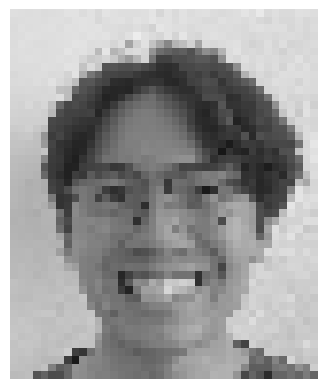

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
The predicted emotion for image (1).png is: happy


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab import files

# Function to load and preprocess the image
def load_and_preprocess_image(img_path, target_size=(48, 48), color_mode='grayscale'):
    img = image.load_img(img_path, target_size=target_size, color_mode=color_mode)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Rescale to [0, 1]
    return img_array

# Function to predict the class of the image
def predict_emotion(img_path, model, color_mode='grayscale'):
    class_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
    img_array = load_and_preprocess_image(img_path, target_size=(48, 48), color_mode=color_mode)
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)
    return class_labels[predicted_class]

# Upload an image
uploaded = files.upload()

for img_path in uploaded.keys():
    # Display the image
    img = mpimg.imread(img_path)
    plt.imshow(img, cmap='gray' if img.ndim == 2 else None)
    plt.axis('off')
    plt.show()

    # Predict the emotion
    predicted_emotion = predict_emotion(img_path, cnn_model, color_mode='grayscale')  # Adjust color_mode accordingly
    print(f'The predicted emotion for {img_path} is: {predicted_emotion}')


B. VGG

Saving image-2.png to image-2.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
The predicted emotion for image-2.png is: fear


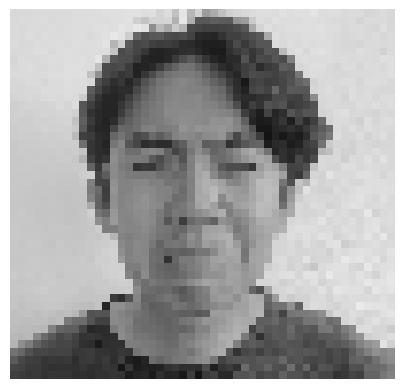

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab import files

# Function to load and preprocess the image
def load_and_preprocess_image(img_path, target_size=(48, 48), color_mode='grayscale'):
    img = image.load_img(img_path, target_size=target_size, color_mode=color_mode)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Rescale to [0, 1]
    return img_array

# Function to predict the class of the image
def predict_emotion(img_path, model, color_mode='grayscale'):
    class_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
    img_array = load_and_preprocess_image(img_path, target_size=(48, 48), color_mode=color_mode)
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)
    return class_labels[predicted_class], color_mode

# Upload and predict
uploaded = files.upload()

for img_path in uploaded.keys():
    # Predict the emotion
    predicted_emotion, color_mode = predict_emotion(img_path, vgg_model, color_mode='grayscale')  # Set the correct color_mode
    print(f'The predicted emotion for {img_path} is: {predicted_emotion}')

    # Display the image
    img = mpimg.imread(img_path)
    plt.imshow(img, cmap='gray' if color_mode == 'grayscale' else None)  # Adjust cmap if grayscale
    plt.axis('off')
    plt.show()


C. ResNut

Saving 6170330681394184496_resized.jpg to 6170330681394184496_resized.jpg


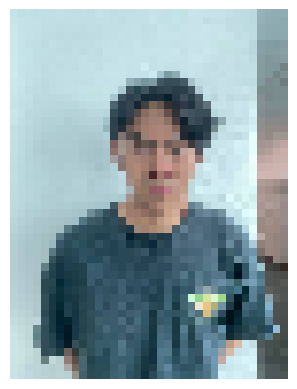

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
The predicted emotion for 6170330681394184496_resized.jpg is: fear


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab import files

# Function to load and preprocess the image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(48, 48))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Rescale to [0, 1]
    return img_array

# Function to predict the class of the image
def predict_emotion(img_path, model):
    class_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
    img_array = load_and_preprocess_image(img_path)
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)
    return class_labels[predicted_class]

# Upload and predict
uploaded = files.upload()

for img_path in uploaded.keys():
    # Display the image
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Predict the emotion
    predicted_emotion = predict_emotion(img_path, resnet_model )  # Replace `model` with the specific model variable
    print(f'The predicted emotion for {img_path} is: {predicted_emotion}')

Metrics Calculation

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_absolute_error, mean_squared_error, log_loss
import numpy as np

# Function to evaluate the model
def evaluate_cnn_model(model, data_generator):
    # Predict probabilities
    y_pred_proba = model.predict(data_generator)  # Predict probabilities
    y_pred = np.argmax(y_pred_proba, axis=1)  # Get class predictions
    y_true = data_generator.classes  # True labels

    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_true, y_pred_proba, multi_class='ovr')
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    cross_entropy = log_loss(y_true, y_pred_proba)

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc,
        'mae': mae,
        'mse': mse,
        'cross_entropy': cross_entropy
    }

#  `cnn_model` is your trained model and `validation_generator` is your data generator
cnn_results = evaluate_model(cnn_model, validation_generator)

# Print the results
print(f"\n{'-'*40}")
print(f"Results for CNN Model")
print(f"{'-'*40}")
print(f"Accuracy        : {cnn_results['accuracy']:.4f}")
print(f"Precision       : {cnn_results['precision']:.4f}")
print(f"Recall          : {cnn_results['recall']:.4f}")
print(f"F1 Score        : {cnn_results['f1_score']:.4f}")
print(f"ROC AUC         : {cnn_results['roc_auc']:.4f}")
print(f"Mean Absolute Error (MAE) : {cnn_results['mae']:.4f}")
print(f"Mean Squared Error (MSE)  : {cnn_results['mse']:.4f}")
print(f"Cross Entropy Loss        : {cnn_results['cross_entropy']:.4f}")
print(f"{'-'*40}")


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "conv2d" is incompatible with the layer: expected axis -1 of input shape to have value 1, but received input with shape (32, 48, 48, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 48, 48, 3), dtype=float32)
  • training=False
  • mask=None

B.VGG

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_absolute_error, mean_squared_error, log_loss
import numpy as np

# Function to evaluate the model
def evaluate_vgg_model(model, data_generator):
    # Predict probabilities
    y_pred_proba = model.predict(data_generator)
    # Predict classes
    y_pred = np.argmax(y_pred_proba, axis=1)
    # True labels
    y_true = data_generator.classes

    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_true, y_pred_proba, multi_class='ovr')
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    cross_entropy = log_loss(y_true, y_pred_proba)

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc,
        'mae': mae,
        'mse': mse,
        'cross_entropy': cross_entropy
    }

#  `vgg_model` is your trained model and `validation_generator` is your data generator
vgg_results = evaluate_vgg_model(vgg_model, validation_generator)

# Print the results
print(f"\n{'-'*40}")
print(f"Results for VGG-like Model")
print(f"{'-'*40}")
print(f"Accuracy        : {vgg_results['accuracy']:.4f}")
print(f"Precision       : {vgg_results['precision']:.4f}")
print(f"Recall          : {vgg_results['recall']:.4f}")
print(f"F1 Score        : {vgg_results['f1_score']:.4f}")
print(f"ROC AUC         : {vgg_results['roc_auc']:.4f}")
print(f"Mean Absolute Error (MAE) : {vgg_results['mae']:.4f}")
print(f"Mean Squared Error (MSE)  : {vgg_results['mse']:.4f}")
print(f"Cross Entropy Loss        : {vgg_results['cross_entropy']:.4f}")
print(f"{'-'*40}")


9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 431ms/step

----------------------------------------
Results for VGG-like Model
----------------------------------------
Accuracy        : 0.1522
Precision       : 0.0232
Recall          : 0.1522
F1 Score        : 0.0402
ROC AUC         : 0.5011
Mean Absolute Error (MAE) : 1.8297
Mean Squared Error (MSE)  : 4.9312
Cross Entropy Loss        : 1.9450
----------------------------------------


C.ResNut

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_absolute_error, mean_squared_error, log_loss
import numpy as np

# Function to evaluate the model
def evaluate_resnet_model(model, data_generator):
    # Predict probabilities
    y_pred_proba = model.predict(data_generator)
    # Predict classes
    y_pred = np.argmax(y_pred_proba, axis=1)
    # True labels
    y_true = data_generator.classes

    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_true, y_pred_proba, multi_class='ovr')
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    cross_entropy = log_loss(y_true, y_pred_proba)

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc,
        'mae': mae,
        'mse': mse,
        'cross_entropy': cross_entropy
    }

#  `resnet_model` is your trained model and `validation_generator` is your data generator
resnet_results = evaluate_resnet_model(resnet_model, validation_generator)

# Print the results
print(f"\n{'-'*40}")
print(f"Results for ResNet Model")
print(f"{'-'*40}")
print(f"Accuracy        : {resnet_results['accuracy']:.4f}")
print(f"Precision       : {resnet_results['precision']:.4f}")
print(f"Recall          : {resnet_results['recall']:.4f}")
print(f"F1 Score        : {resnet_results['f1_score']:.4f}")
print(f"ROC AUC         : {resnet_results['roc_auc']:.4f}")
print(f"Mean Absolute Error (MAE) : {resnet_results['mae']:.4f}")
print(f"Mean Squared Error (MSE)  : {resnet_results['mse']:.4f}")
print(f"Cross Entropy Loss        : {resnet_results['cross_entropy']:.4f}")
print(f"{'-'*40}")



9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 713ms/step

----------------------------------------
Results for ResNet Model
----------------------------------------
Accuracy        : 0.1522
Precision       : 0.0232
Recall          : 0.1522
F1 Score        : 0.0402
ROC AUC         : 0.5057
Mean Absolute Error (MAE) : 1.8297
Mean Squared Error (MSE)  : 4.9312
Cross Entropy Loss        : 1.9449
----------------------------------------


Baseline Models

In [ ]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, mean_absolute_error, mean_squared_error
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image data generator for dataset loading
datagen = ImageDataGenerator(
    rescale=1./255,         # Rescale pixel values to [0, 1]
    validation_split=0.2    # Split data into training and validation sets
)

# Specify the paths to your dataset
dataset_path = '/content/drive/MyDrive/Train'

# Create data generators
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(48, 48),   # Resize images to 48x48
    color_mode='grayscale', # Convert images to grayscale
    batch_size=32,          # Number of images to yield per batch
    class_mode='categorical', # Use categorical labels (for multi-class classification)
    subset='training',      # Set as training data
    shuffle=True
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(48, 48),   # Resize images to 48x48
    color_mode='grayscale', # Convert images to grayscale
    batch_size=32,          # Number of images to yield per batch
    class_mode='categorical', # Use categorical labels (for multi-class classification)
    subset='validation',    # Set as validation data
    shuffle=True
)

# Extract data from generators for baseline models
def extract_data(generator):
    data = []
    labels = []
    for i in range(len(generator)):
        imgs, lbls = generator[i]
        data.extend(imgs)
        labels.extend(lbls)
    return np.array(data), np.array(labels)

X_train, y_train = extract_data(train_generator)
X_val, y_val = extract_data(validation_generator)

# Flatten the images for baseline models
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)

# Convert one-hot labels to categorical labels
y_train_cat = np.argmax(y_train, axis=1)
y_val_cat = np.argmax(y_val, axis=1)

# Standardize the data
scaler = StandardScaler()
X_train_flat = scaler.fit_transform(X_train_flat)
X_val_flat = scaler.transform(X_val_flat)

# Baseline Model: K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_flat, y_train_cat)
y_pred_knn = knn.predict(X_val_flat)

# Baseline Model: Support Vector Machine (SVM)
svm = SVC(probability=True)
svm.fit(X_train_flat, y_train_cat)
y_pred_svm = svm.predict(X_val_flat)

# Baseline Model: Random Forest (RF)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_flat, y_train_cat)
y_pred_rf = rf.predict(X_val_flat)

# Evaluation
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_true, rf.predict_proba(X_val_flat), multi_class='ovr') if model_name == 'RF' else roc_auc_score(y_true, svm.predict_proba(X_val_flat), multi_class='ovr') if model_name == 'SVM' else 'N/A'
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    print(f"{model_name} Accuracy: {accuracy}")
    print(f"{model_name} Precision: {precision}")
    print(f"{model_name} Recall: {recall}")
    print(f"{model_name} F1 Score: {f1}")
    print(f"{model_name} ROC AUC: {roc_auc}")
    print(f"{model_name} MAE: {mae}")
    print(f"{model_name} MSE: {mse}")

evaluate_model(y_val_cat, y_pred_knn, 'KNN')
evaluate_model(y_val_cat, y_pred_svm, 'SVM')
evaluate_model(y_val_cat, y_pred_rf, 'RF')


Found 1106 images belonging to 7 classes.
Found 276 images belonging to 7 classes.
KNN Accuracy: 0.18840579710144928
KNN Precision: 0.21215162905204982
KNN Recall: 0.18840579710144928
KNN F1 Score: 0.1802997873268006
KNN ROC AUC: N/A
KNN MAE: 2.2572463768115942
KNN MSE: 8.177536231884059
SVM Accuracy: 0.32608695652173914
SVM Precision: 0.3124151433765011
SVM Recall: 0.32608695652173914
SVM F1 Score: 0.3146114933045796
SVM ROC AUC: 0.7036648162097725
SVM MAE: 1.8695652173913044
SVM MSE: 6.608695652173913
RF Accuracy: 0.286231884057971
RF Precision: 0.2662642418220708
RF Recall: 0.286231884057971
RF F1 Score: 0.27127784287381906
RF ROC AUC: 0.664340797280362
RF MAE: 1.8840579710144927
RF MSE: 6.456521739130435
